<a href="https://colab.research.google.com/github/shznaqvi/AMANHI-COVID-19-Study/blob/main/_notebooks/2020-04-22-Tracking_GPU_Memory_Usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tracking GPU Memory Usage
> A tutorial of checking memory usage

- toc: true 
- badges: true
- comments: true
- categories: [jupyter, deep-learning]
- image: images/copied_from_nb/nb_assets/undraw_server_cluster.png
- label: Ops


The most amazing thing about Collaboratory (or Google's generousity) is that there's also GPU option available.  

In this short notebook we look at how to track GPU memory usage.

![GPU Stats screenshot](https://github.com/kannankumar/data-diary/blob/master/_notebooks/nb_assets/undraw_server_cluster.png?raw=1)
This notebook has been divided into sections.
Feel free to skip the sections which you are already familar with.

-----
**Footnote**: *This notebook is a fork of [a great Colab notebook](https://colab.research.google.com/drive/1P7okDVh6viCIOkii6UAF2O9sTAcKGNWq) and it is edited for my personal reference.*


## Enabling GPU (on Colab)
If you are using a Colab environment and have not tried switching to the GPU mode on the Colab notebook before, here's a quick refresher on that.  

**When using another notebook/environment you will need to find out  
how to connect to a GPU runtime on your own.**  

*Sorry, I haven't perfected my environment-sensing and mind-reading skills yet.*


Follow on the collaboratory menu tabs, "Runtime" => "Change runtime type".

  

### Choosing Runtime type
Then you should see a pop-up where you can choose GPU.


After you change your runtime, your runtime should automatically restart (which means information from executed cells disappear).
  

### Checking Runtime type
A quick way to check your current runtime is to hover on the toolbar where it shows the `RAM` and `Disk` details.  
If it mentions **`"(GPU)"`**, then the Colab notebook is connected to a GPU runtime. Otherwise a standard CPU runtime.

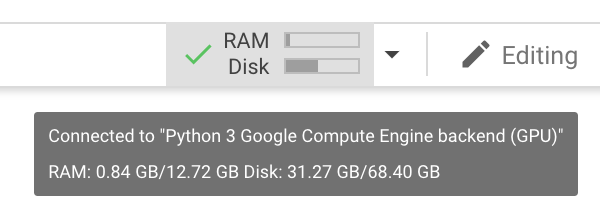

## Checking GPU availability
To find out if GPU is available, we have two preferred ways: 


1.   **PyTorch / Tensorflow APIs** (Framework interface)  
  > Every  deep learning framework has an API to check the details of the available GPU devices.


2.   **Nvidia SMI** (Command line interface)   
  > Nvidia is the manufacturer of the GPUs currently used for Deep Learning.    
  Nvidia provides a command line tool for their System Management Interface(`nvidia-smi` for short)
  


### pytorch

In [ ]:
import torch
torch.cuda.is_available()

True


### nvidia-smi
If you own GPU you may be familiar with `nvidia-smi`, NVIDIA binary to print out gpu's utilization summary.

`nvidia-smi` is now available by default in the colab environment.  
Running `nvidia-smi` gives the details of the connected GPU runtime.

In [ ]:
!nvidia-smi

Sun Apr 19 17:59:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    26W / 250W |     10MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Violla! I got Tesla P100 GPU w/ 16 GB memory.
This could be different for you.  
On Google Colab you might get a Tesla K80 GPU with 12 GB memory too.

Now if you want to acquire values in this summary text, youl probably want something else like `gputi`.

Next section demonstrates how.

## Fetching GPU usage stats in code

To find out if GPU is available, we have again multiple ways.  
I have two preferred ways based on whether I'm working with a DL framework or writing things from scratch.  
Here they are: 


1.   **PyTorch / Tensorflow APIs** (Framework interface)  
  > Every deep learning framework has an API to monitor the stats of the GPU devices.  
  It is easier to use this if working with a DL framework.


2.   **USing GPUtil python packages** (Custom function)   
  > A few python packages like `gputil` provide a interface to fetch GPU usage statistics.  
  This can be used if you are not working with any DL framework.
  

### 1. Pytorch CUDA APIs

In [ ]:
import torch

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cuda

Tesla P100-PCIE-16GB
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


### 2. Using GPUtil python package

Let's start by installing a few packages needed to print out our process memory usage...

In [ ]:
!pip install gputil
!pip install psutil
!pip install humanize

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=52a9da8425c2b31a65708cba7214a056bc17e9d99dc55b740d130f0d4ee71c32
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil


Now `gputil`, `psutil`, and `humanize` are all available. 


#### `mem_report` helper function

Here's a simple function to print out memory usage on **both** CPU and GPU.

In [ ]:
# Import packages
import os,sys,humanize,psutil,GPUtil

# Define function
def mem_report():
  print("CPU RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ))
  
  GPUs = GPUtil.getGPUs()
  for i, gpu in enumerate(GPUs):
    print('GPU {:d} ... Mem Free: {:.0f}MB / {:.0f}MB | Utilization {:3.0f}%'.format(i, gpu.memoryFree, gpu.memoryTotal, gpu.memoryUtil*100))
    
# Execute function
# mem_report()

#### Trying it out
To test the usage of GPU memory using the above function, lets do the following:
- Download a pretrained model from the pytorch model library and transfer it to the Cuda GPU.
- Then we can run the `mem_report()` helper function to check the used/available GPU statistics.

In [ ]:
import torchvision.models as models

wide_resnet50_2 = models.wide_resnet50_2(pretrained=True)
if torch.cuda.is_available():
  resnet18.cuda()

mem_report()

CPU RAM Free: 11.5 GB
GPU 0 ... Mem Free: 11058MB / 11441MB | Utilization   3%


## Closing words
Now you can use any of the above methods anywhere you want the GPU Memory Usage from. 

> I typically use it from while training a Deep Learning model within the training loop. This helps me to get a sense of how much of the GPU memory is available/unused by me. Based on that I can increase/decrease the batch size to utilize the GPU resources efficiently.